### Group Members:



* Courtney Mueller
* Angel Camacho 
* Matthew Grover 

In [23]:
#importing potentially necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'pandas'

***
## First Dataset: [FirstDataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/code?resource=download)
#### Display information about rows and columns in dataset:

In [ ]:
df1 = pd.read_csv('./Data/game_info.csv')

Df1 base stats 

In [ ]:
print("shape: ",df1.shape)

shape:  (474417, 27)


plotting genre frequency \
from the genre count we can see that we have sufficient games to produce reccomendations 

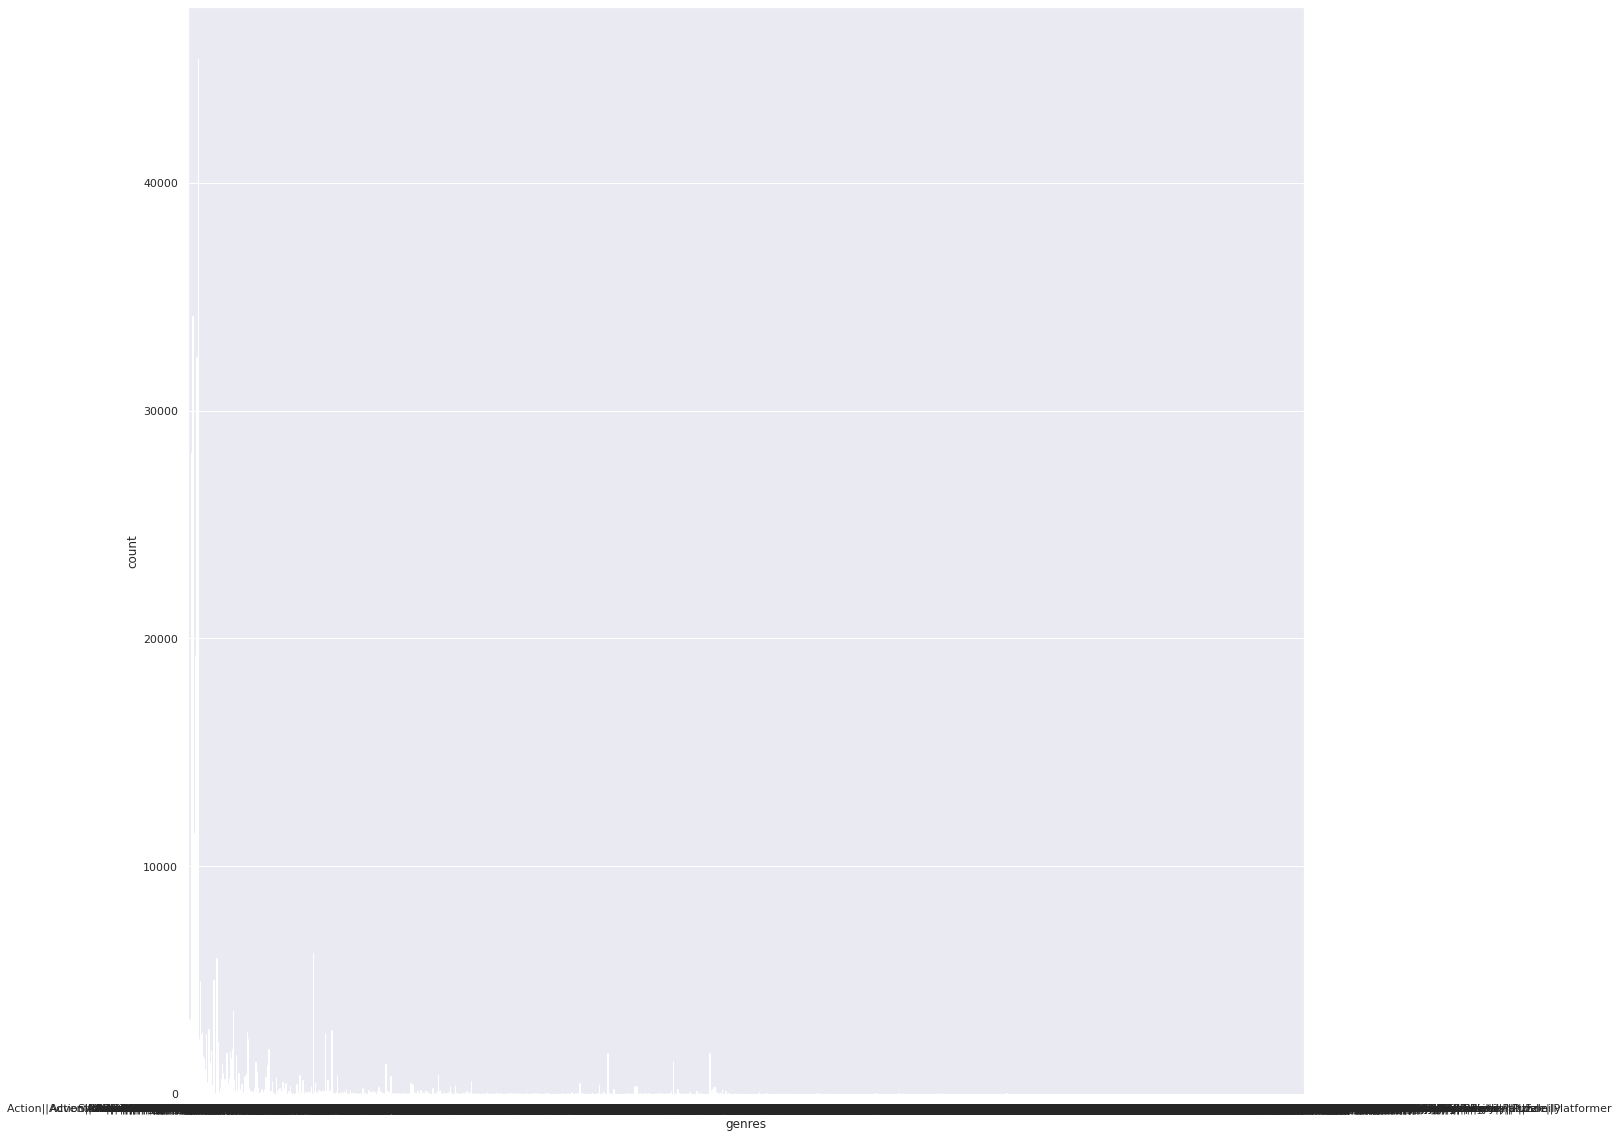

In [ ]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="genres",data=df1)


# Second Kaggle Dataset
https://www.kaggle.com/datasets/gregorut/videogamesales

Read in data set 

In [22]:
df2 = pd.read_csv('./Data/vgsales.csv')
print("shape: ",df2.shape)
df2.head()

NameError: name 'pd' is not defined

plot genre freq

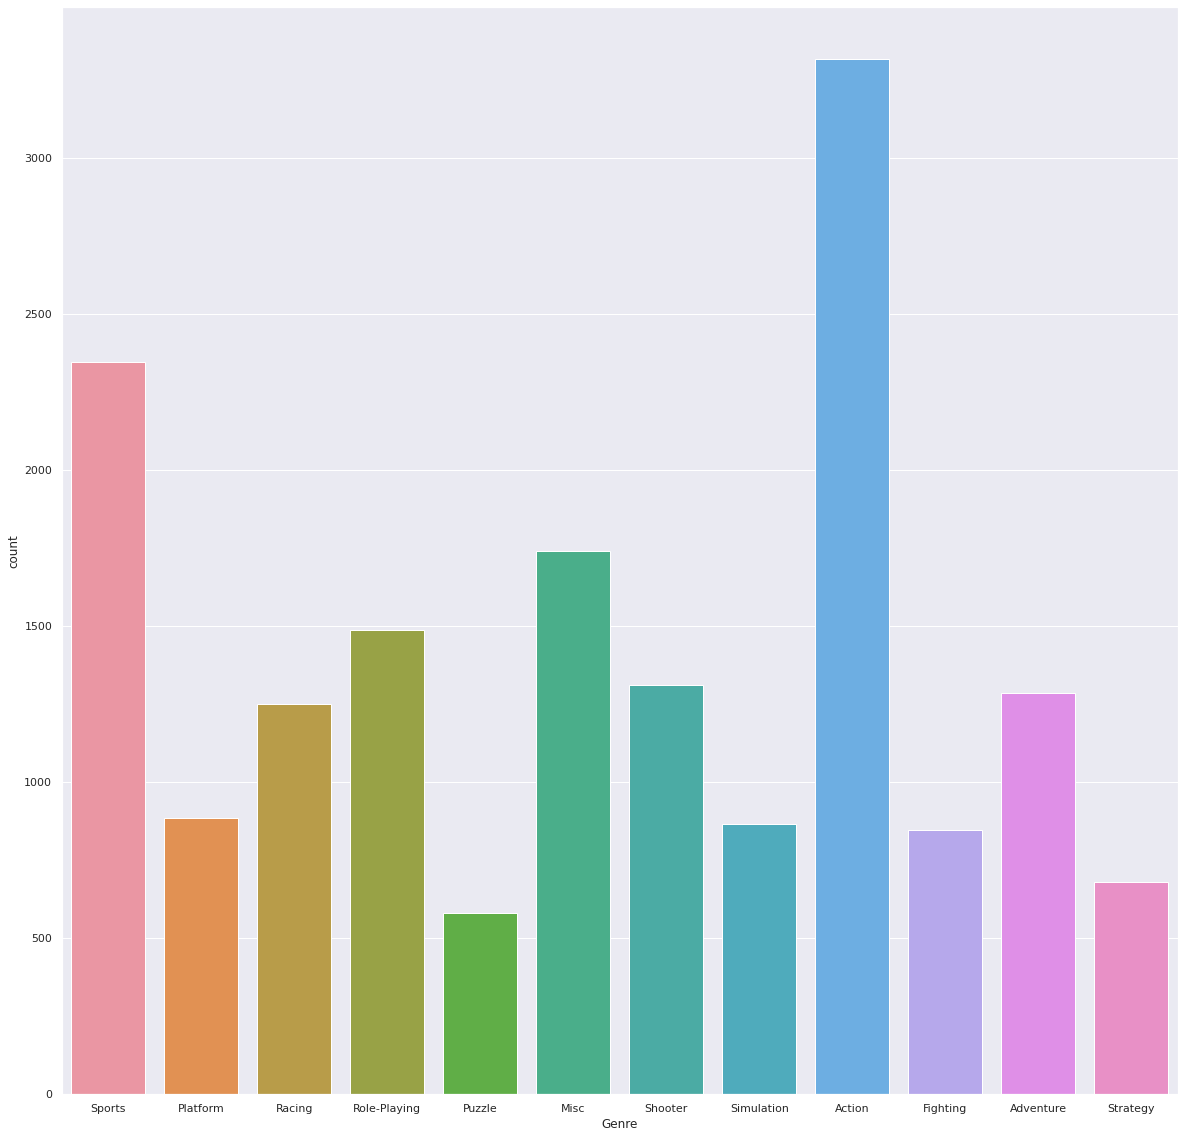

In [ ]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="Genre",data=df2)

---


# **Analysis** 

The two datasets that we have chosen for our project have both shown sufficient instances and provide viable statistics for a reliable analysis. While one has a larger variety of genres for nuanced analysis. The second data set has the smaller set of data but also a more concise set of genres, making it easier for us to analyze the data based on genre of game. Having some type of filter system for genre is something we wanted to rely heavily upon for our database analysis so having something that has that implemented prior makes it a little easier on us to conceptualize how we want to bring our project together. After having a meeting and coming together to agree upon the direction we want to take our project in - we decided that the main focus of our project is going to be grouping together game titles based upon genre in hopes to establish a target audience. We are hoping with this target audience we will be able to initiate an increase in willingness to try new game titles based upon recommendations based on our anaylsis. Due to the nature of this problem, we see our project being a good example of a "clustering" data mining technique.

### Game sales by publisher stage 4 
we want to analyse how publisher may affect sales in regions


In [21]:
vgs = df2.dropna(axis=0)
vgs.info()
vgs.head()

NameError: name 'df2' is not defined

After runnning this piece of code we will see that there are no indie games when compared to a list of indie games from wikepidia. This means in later stages we might want to include a indie game database to include that side of the market. 

In [ ]:
inlist = False
count =0
with open('./Data/indiegames.txt', 'r') as reader:
    # Read and print the entire file line by line
    line = reader.readline()
    while line != '':  # The EOF char is an empty string
        #print(line, end='')
        line = reader.readline()
        y = line.lower()
        y = y.replace(" ","")
        y.strip()
        for i in vgs['Name']:
            i = i.lower()
            i = i.replace(" ","")
            i.strip()
            if y == i:
                inlist =True
                count+=1
            
if inlist:
    print("there exist some indie games:")
    print("sum of indie games in list: ",count)
else:
    print("no indie games")
        

no indie games


In [20]:
#ensure no non existant rows that will mess with our data
vgs = vgs.dropna(axis = 0)

NameError: name 'vgs' is not defined

From this we can see that there is a large variety of publishers meaning we may want to shrink the number of publishers we are looking at. We produce a csv that shows how many times a unique publisher shows up in the data set. We generate a new csv with that data. Another way to handle the imbalance in the ammount of data we see is to scale our values out by the number of instances of that publisher. For example Electronic arts has 1339 entries meaning we need to scale the way it affects total sells by its percentage of the enteries. Especially compared to a publisher such as MediaQuest with 1 entry. 

In [19]:
#generate a list wich may be easier to use in code
countlist = vgs['Publisher'].value_counts()
print(countlist)
#generate a new csv code for count data 
#commented out to prvent constant writes
# count = vgs.groupby(['Publisher']).count()
# count.head()
# count.to_csv('./Data/publishercount.csv')

NameError: name 'vgs' is not defined

In [ ]:
print("this is a git test")

this is a git test
